## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
MSdataresult = pd.merge(mouse_metadata,study_results)

# Display the data table for preview
MSdataresult

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
MSdatacount = MSdataresult.value_counts
MSdatacount

<bound method DataFrame.value_counts of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
MSDup= MSdataresult[MSdataresult.duplicated(['Mouse ID', 'Timepoint'])]
MSDup
                                                       
#only keeping the first instance

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
MouseDuplicate = MSdataresult.duplicated(subset = ["Mouse ID"], keep = False)
MouseDuplicate


0       True
1       True
2       True
3       True
4       True
        ... 
1888    True
1889    True
1890    True
1891    True
1892    True
Length: 1893, dtype: bool

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
MouseClean = MSdataresult.drop_duplicates(subset = ["Mouse ID"], keep = "first")
MouseClean

#onlt keeping the first instance


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
MSCleanCount = MouseClean.value_counts
MSCleanCount

<bound method DataFrame.value_counts of      Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
10       s185    Capomulin  Female           3          17          0   
20       x401    Capomulin  Female          16          15          0   
30       m601    Capomulin    Male          22          17          0   
40       g791     Ramicane    Male          11          16          0   
...       ...          ...     ...         ...         ...        ...   
1858     z314     Stelasyn  Female          21          28          0   
1860     z435     Propriva  Female          12          26          0   
1863     z581    Infubinol  Female          24          25          0   
1873     z795     Naftisol  Female          13          29          0   
1883     z969     Naftisol    Male           9          30          0   

      Tumor Volume (mm3)  Metastatic Sites  
0                   45.0              

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# MSdataresult - DF file

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drugregigroup = MSdataresult.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
TumorVMean = drugregigroup['Tumor Volume (mm3)'].mean()
TumorVMed = drugregigroup['Tumor Volume (mm3)'].median()
TumorVSTD = drugregigroup['Tumor Volume (mm3)'].std()
TumorVSEM = drugregigroup['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = {"Tumor Volume Mean": TumorVMean, 
              "Tumor Volume Median": TumorVMed, 
              "Tumor Volume STD": TumorVSTD, 
              "Tumor Volume Standard Error of Mean": TumorVSEM}
summary_df

{'Tumor Volume Mean': Drug Regimen
 Capomulin    40.675741
 Ceftamin     52.591172
 Infubinol    52.884795
 Ketapril     55.235638
 Naftisol     54.331565
 Placebo      54.033581
 Propriva     52.322552
 Ramicane     40.216745
 Stelasyn     54.233149
 Zoniferol    53.236507
 Name: Tumor Volume (mm3), dtype: float64,
 'Tumor Volume Median': Drug Regimen
 Capomulin    41.557809
 Ceftamin     51.776157
 Infubinol    51.820584
 Ketapril     53.698743
 Naftisol     52.509285
 Placebo      52.288934
 Propriva     50.854632
 Ramicane     40.673236
 Stelasyn     52.431737
 Zoniferol    51.818479
 Name: Tumor Volume (mm3), dtype: float64,
 'Tumor Volume STD': Drug Regimen
 Capomulin    4.994774
 Ceftamin     6.268188
 Infubinol    6.567243
 Ketapril     8.279709
 Naftisol     8.134708
 Placebo      7.821003
 Propriva     6.507770
 Ramicane     4.846308
 Stelasyn     7.710419
 Zoniferol    6.966589
 Name: Tumor Volume (mm3), dtype: float64,
 'Tumor Volume Standard Error of Mean': Drug Regimen
 C

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#i dont understand this question. only thing i can think of is that it wants me to do something completely different than what
    #i am about to this in the aggregation. 

#possibles Variables being reused
# drugregigroup
# summary_df



# Using the aggregation method, produce the same summary statistics in a single line
druggroupaggg = drugregigroup.agg({'Tumor Volume (mm3)':['mean', 'median', 'std', 'sem']
})
druggroupaggg

#https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html
#use that website to get .agg syntax

Tumor Volume (mm3)                               
                           mean     median       std       sem
Drug Regimen                                                  
Capomulin             40.675741  41.557809  4.994774  0.329346
Ceftamin              52.591172  51.776157  6.268188  0.469821
Infubinol             52.884795  51.820584  6.567243  0.492236
Ketapril              55.235638  53.698743  8.279709  0.603860
Naftisol              54.331565  52.509285  8.134708  0.596466
Placebo               54.033581  52.288934  7.821003  0.581331
Propriva              52.322552  50.854632  6.507770  0.512884
Ramicane              40.216745  40.673236  4.846308  0.320955
Stelasyn              54.233149  52.431737  7.710419  0.573111
Zoniferol             53.236507  51.818479  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

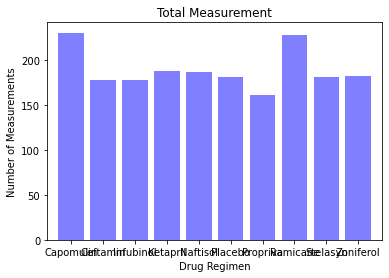

In [51]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# MSdataresult Merge CSV
# drugregigroup Groupby on Drug Regimen

WeightCount = drugregigroup['Weight (g)'].count()
DrugNames = MSdataresult.iloc[:, [1]]
DrugNames

DrugList = np.unique(DrugNames).tolist()
DrugList

plt.bar(DrugList, WeightCount, color='b', alpha=0.5, align="center")
plt.xlim(-0.75, len(DrugList)-0.25)
plt.title("Total Measurement")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

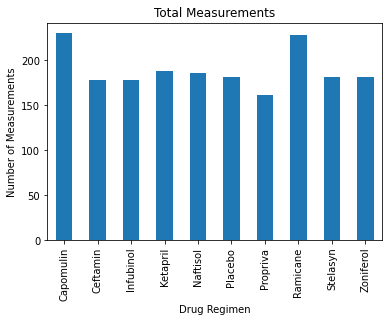

<Figure size 432x288 with 0 Axes>

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
WeightCount = drugregigroup['Weight (g)'].count()
WeightCount

WeightPandas = WeightCount.plot(kind="bar", title="Total Measurements")
WeightPandas.set_xlabel("Drug Regimen")
WeightPandas.set_ylabel("Number of Measurements")

plt.show()
plt.tight_layout()


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# MSdataresult Merge CSV


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# MSdataresult Merge CSV


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
